# Model

In [4]:
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:

%matplotlib inline

In [6]:
df = pd.read_csv('df_final.csv')

In [7]:
df_test = df[df["ClinicNames"]== "CLEVELAND CLINIC FERTILITY CENTER BEACHWOOD"]

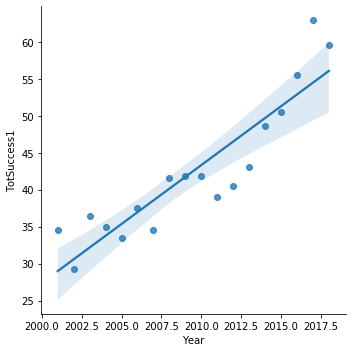

In [8]:
sns.lmplot(x='Year', y='TotSuccess1', data=df_test)

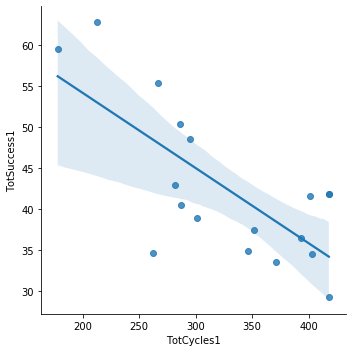

In [94]:
sns.lmplot(x='TotCycles1', y='TotSuccess1', data=df_test)

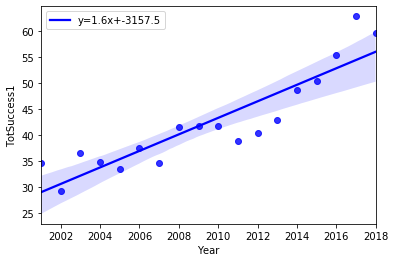

In [36]:
from scipy import stats
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(df_test['Year'],df_test['TotSuccess1'])

# use line_kws to set line label for legend
ax = sns.regplot(x="Year", y="TotSuccess1", data=df_test, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

In [101]:
df_test['TotSuccess1'].mean()

42.522222222222226

In [102]:
df_test['TotSuccess1'].std()

9.382261457951357

In [38]:
slope

1.5924664602683178

In [34]:
df.columns

Index(['Unnamed: 0', 'index', 'CurrentClinicName1', 'CurrentClinicCity',
       'CurrentClinicState', 'Year', 'TotCycles1', 'TotCycles2', 'TotCycles3',
       'TotCycles4', 'TotSuccess1', 'TotSuccess2', 'TotSuccess3',
       'TotSuccess4', 'ClinicNames'],
      dtype='object')

In [108]:
def predict_clinc_performance(df, clinic_name, age):
    
    df = df[df['ClinicNames']==clinic_name]
    
    if age < 35:
        x = df['TotCycles1']
        y = df['Year']
    elif age >= 35 and age <= 37:
        x = df['TotCycles2']
        y = df['TotSuccess2']
    elif age > 37 and age <= 40:
        x = df['TotCycles2']
        y = df['TotSuccess2']
    else:
        x = df['TotCycles4']
        y = df['TotSuccess4']
        
    model = pymc3.Model()
    with pm.Model() as linear_model:
        # Intercept
        intercept = pm.Normal('Intercept', mu = 0, sd = 5)
    
        # Slope 
        slope = pm.Normal('slope', mu = 0, sd = 5)
    
        # Standard deviation
        sigma = pm.HalfNormal('sigma', sd = 10)
    
        # Estimate of mean
        mean = intercept + slope * x
    
        # Observed values
        Y_obs = pm.Normal('Y_obs', mu = mean, sd = sigma, observed = y)
    
        # Sampler
        step = pm.NUTS()

        # Posterior distribution
        linear_trace = pm.sample(1000, step)
    
    plt.figure(figsize = (8, 8))
    #pm.plot_posterior_predictive_glm(linear_trace, samples = 10, eval=np.linspace(2000, 10, 100), linewidth = 1, 
    #                             color = 'red', alpha = 0.8, label = 'Bayesian Posterior Fits',
    #                            lm = lambda x, sample: sample['Intercept'] + sample['slope'] * x);
    pm.plot_posterior_predictive_glm(linear_trace, samples = 18, eval=np.linspace(2000, 2020, 20), linewidth = 1, 
                                 color = 'red', alpha = 0.8, label = 'Bayesian Posterior Fits',
                                lm = lambda x, sample: sample['slope'] * x);
    plt.scatter(x, y.values, s = 12, alpha = 0.8, c = 'blue', label = 'Observations')
    #plt.plot(x, by_hand_coefs[0] + x * by_hand_coefs[1], 'k--', label = 'OLS Fit', linewidth = 1.4)
    plt.title('Posterior Predictions with all Observations', size = 20); plt.xlabel('Year', size = 18);
    plt.ylabel('% Success', size = 18);
    plt.legend(prop={'size': 16});
    

In [109]:
predict_clinc_performance(df, 'CLEVELAND CLINIC FERTILITY CENTER BEACHWOOD', 32)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, slope]
Sampling 4 chains, 0 divergences:   0%|          | 0/6000 [00:33<?, ?draws/s]


ValueError: Not enough samples to build a trace.

In [49]:
df_

NameError: name 'plot' is not defined

In [21]:
df_1.columns

Index(['Unnamed: 0', 'PrevClinName1', 'ClinCityCode', 'Year', 'FshNDCycle1',
       'FshNDCycle2', 'FshNDCycle3', 'FshNDCycle4', 'FshNDLvBirthsRate1',
       'FshNDLvBirthsRate2', 'FshNDLvBirthsRate3', 'FshNDLvBirthsRate4',
       'FshNDCansRate1', 'FshNDCansRate2', 'FshNDCansRate3', 'FshNDCansRate4',
       'ThwNDLvBirthsRate1', 'ThwNDLvBirthsRate2', 'ThwNDLvBirthsRate3',
       'ThwNDLvBirthsRate4', 'ThwNDTransfers1', 'ThwNDTransfers2',
       'ThwNDTransfers3', 'ThwNDTransfers4', 'Diag_TubalRate',
       'Diag_OvulatoryRate', 'Diag_DORRate', 'Diag_EndometriosisRate',
       'Diag_UterineRate', 'Diag_MaleRate', 'Diag_OtherRate',
       'FshNDEmbryosRate1', 'FshNDEmbryosRate2', 'FshNDEmbryosRate3',
       'FshNDEmbryosRate4', 'ThwNDEmbryosRate1', 'ThwNDEmbryosRate2',
       'ThwNDEmbryosRate3', 'ThwNDEmbryosRate4', 'TotCycles', 'TotFrozTrans',
       'AvgCancel', 'AvgFreshBR', 'AvgFrozenBR', 'AvgNumFrshEmbry',
       'AvgNumThwEmbry'],
      dtype='object')

In [ ]:
#https://www.kaggle.com/sathi557/bayesian-linear-regression-demo

In [110]:
with pm.Model() as linear_model:
    # Intercept
    intercept = pm.Normal('Intercept', mu = 0, sd = 10)
    
    # Slope 
    slope = pm.Normal('slope', mu = 0, sd = 10)
    
    # Standard deviation
    sigma = pm.HalfNormal('sigma', sd = 10)
    
    # Estimate of mean
    mean = intercept + slope * x
    
    # Observed values
    Y_obs = pm.Normal('Y_obs', mu = mean, sd = sigma, observed = y)
    
    # Sampler
    step = pm.NUTS()

    # Posterior distribution
    linear_trace = pm.sample(1000, step)
    
    
    plt.figure(figsize = (8, 8))
    pm.plot_posterior_predictive_glm(linear_trace, samples = 10, eval=np.linspace(20, 200, 100), linewidth = 1, 
                                 color = 'red', alpha = 0.8, label = 'Bayesian Posterior Fits',
                                lm = lambda x, sample: sample['Intercept'] + sample['slope'] * x);
    plt.scatter(x, y.values, s = 12, alpha = 0.8, c = 'blue', label = 'Observations')
    #plt.plot(x, by_hand_coefs[0] + x * by_hand_coefs[1], 'k--', label = 'OLS Fit', linewidth = 1.4)
    plt.title('Posterior Predictions with all Observations', size = 20); plt.xlabel('Year', size = 18);
    plt.ylabel('% Success', size = 18);
    plt.legend(prop={'size': 16});

ValueError: Input dimension mis-match. (input[0].shape[0] = 16, input[1].shape[0] = 100)

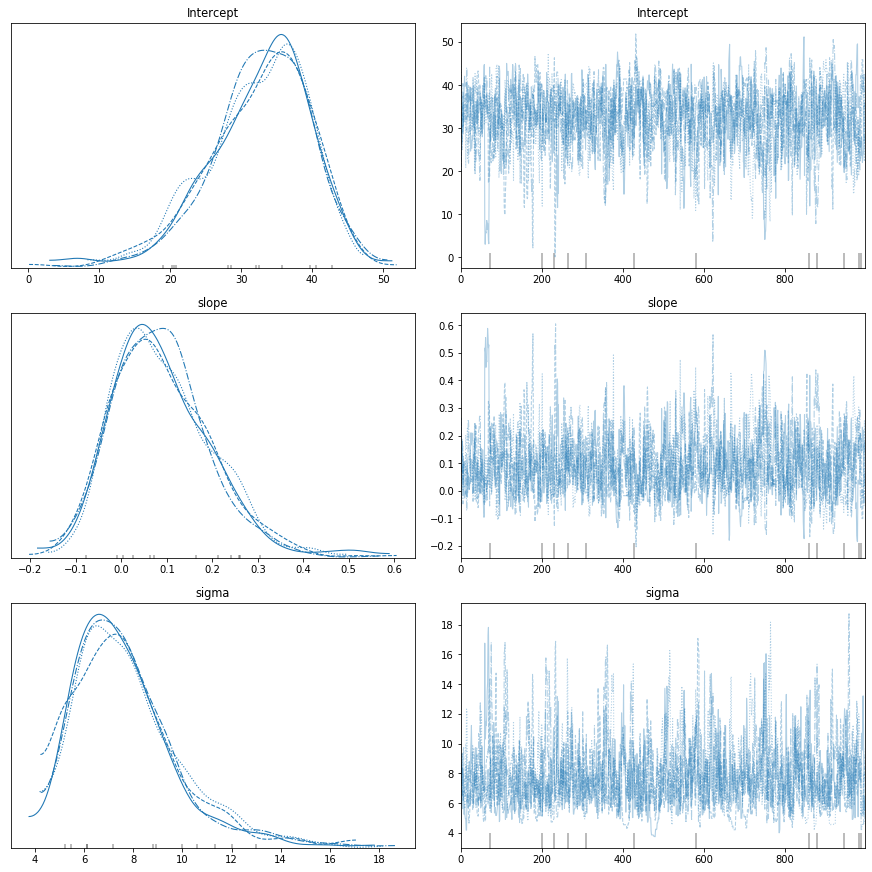

In [45]:
pm.traceplot(linear_trace, figsize = (12, 12));

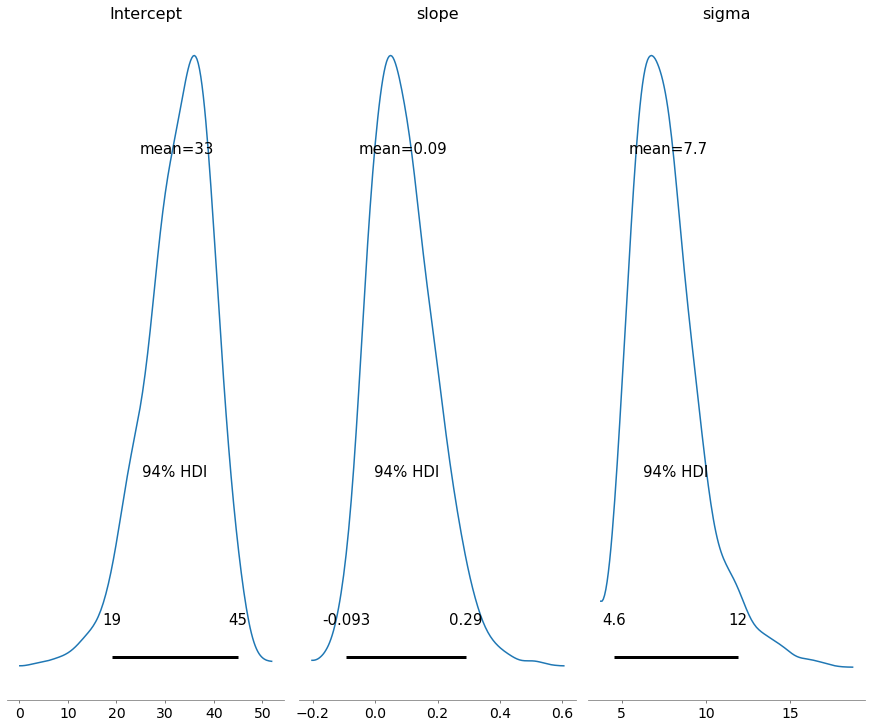

In [46]:
pm.plot_posterior(linear_trace, figsize = (12, 10));

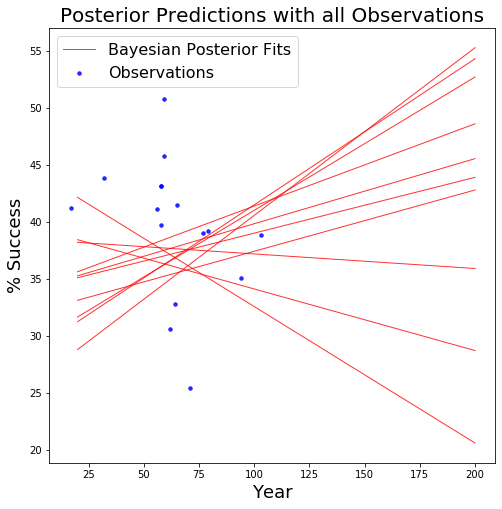

In [48]:
plt.figure(figsize = (8, 8))
pm.plot_posterior_predictive_glm(linear_trace, samples = 10, eval=np.linspace(20, 200, 100), linewidth = 1, 
                                 color = 'red', alpha = 0.8, label = 'Bayesian Posterior Fits',
                                lm = lambda x, sample: sample['Intercept'] + sample['slope'] * x);
plt.scatter(x, y.values, s = 12, alpha = 0.8, c = 'blue', label = 'Observations')
#plt.plot(x, by_hand_coefs[0] + x * by_hand_coefs[1], 'k--', label = 'OLS Fit', linewidth = 1.4)
plt.title('Posterior Predictions with all Observations', size = 20); plt.xlabel('Year', size = 18);
plt.ylabel('% Success', size = 18);
plt.legend(prop={'size': 16});

In [19]:
#import pymc3 as pm

# Context for the model
with pm.Model() as normal_model:
    
    # The prior for the data likelihood is a Normal Distribution
    family = pm.glm.families.Normal()
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = x, family = family)
    
    # Perform Markov Chain Monte Carlo sampling letting PyMC3 choose the algorithm
    normal_trace = pm.sample(draws=2000, chains = 2, tune = 500, njobs=-1)

NameError: name 'formula' is not defined

In [67]:
x = np.linspace(0, 1, 100)

In [68]:
x

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [77]:
data = 0.1 + np.random.randn(10000)

(array([  5.,  10.,  17.,  38.,  61., 117., 152., 227., 341., 469., 564.,
        722., 858., 859., 864., 864., 825., 737., 589., 510., 388., 270.,
        191., 149.,  77.,  48.,  23.,  15.,   6.,   4.]),
 array([-3.21046154, -2.98540827, -2.76035499, -2.53530172, -2.31024845,
        -2.08519517, -1.8601419 , -1.63508863, -1.41003535, -1.18498208,
        -0.95992881, -0.73487553, -0.50982226, -0.28476899, -0.05971571,
         0.16533756,  0.39039083,  0.61544411,  0.84049738,  1.06555065,
         1.29060393,  1.5156572 ,  1.74071047,  1.96576375,  2.19081702,
         2.41587029,  2.64092357,  2.86597684,  3.09103011,  3.31608339,
         3.54113666]),
 <a list of 30 Patch objects>)

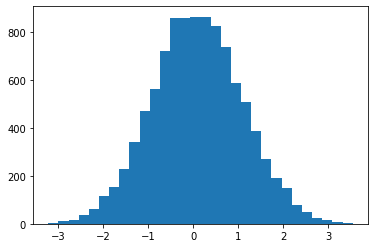

In [78]:
plt.hist(x=data, bins=30)

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns


sns.set(style="darkgrid", palette="muted")


def simulate_linear_data(N, beta_0, beta_1, eps_sigma_sq):
    """
    Simulate a random dataset using a noisy
    linear process.

    N: Number of data points to simulate
    beta_0: Intercept
    beta_1: Slope of univariate predictor, X
    """
    # Create a pandas DataFrame with column 'x' containing
    # N uniformly sampled values between 0.0 and 1.0
    df = pd.DataFrame(
        {"x": 
            np.random.RandomState(42).choice(
                map(
                    lambda x: float(x)/100.0, 
                    np.arange(100)
                ), N, replace=False
            )
        }
    )

    # Use a linear model (y ~ beta_0 + beta_1*x + epsilon) to 
    # generate a column 'y' of responses based on 'x'
    eps_mean = 0.0
    df["y"] = beta_0 + beta_1*df["x"] + np.random.RandomState(42).normal(
        eps_mean, eps_sigma_sq, N
    )

    return df


if __name__ == "__main__":
    # These are our "true" parameters
    beta_0 = 1.0  # Intercept
    beta_1 = 2.0  # Slope

    # Simulate 100 data points, with a variance of 0.5
    N = 100
    eps_sigma_sq = 0.5

    # Simulate the "linear" data using the above parameters
    df = simulate_linear_data(N, beta_0, beta_1, eps_sigma_sq)

    # Plot the data, and a frequentist linear regression fit
    # using the seaborn package
    sns.lmplot(x="x", y="y", data=df, size=10)
    plt.xlim(0.0, 1.0)

ValueError: a must be 1-dimensional or an integer

In [22]:
y = df_test['TotSuccess1']
x = df_test['Year']

In [10]:
with pm.Model() as pooled:
    mu = pm.Normal('mu', 0, sigma=5)
    
    sigma = pm.HalfNormal('sigma', sd = 5)

    obs = pm.Normal('obs', mu, sigma=sigma, observed=y)

    trace_p = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [01:35<00:00, 62.77draws/s]  
The acceptance probability does not match the target. It is 0.9780927611284677, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9997875168878668, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The acceptance probability does not match the target. It is 0.9857924966821245, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9383404833919918, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameter

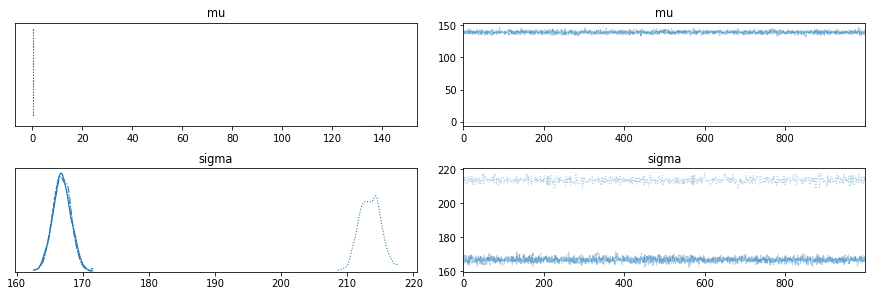

In [11]:
pm.traceplot(trace_p);

In [3]:
J = 8
y = np.array([28,  8, -3,  7, -1,  1, 18, 12])
sigma = np.array([15, 10, 16, 11,  9, 11, 10, 18])

In [4]:

with pm.Model() as pooled:
    mu = pm.Normal('mu', 0, sigma=1e6)

    obs = pm.Normal('obs', mu, sigma=sigma, observed=y)

    trace_p = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [00:01<00:00, 4115.41draws/s]


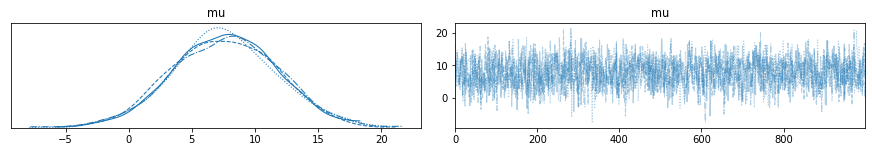

In [5]:
pm.traceplot(trace_p);


In [ ]:

with pm.Model() as hierarchical:

    eta = pm.Normal('eta', 0, 1, shape=J)
    mu = pm.Normal('mu', 0, sigma=1e6)
    tau = pm.HalfCauchy('tau', 5)

    theta = pm.Deterministic('theta', mu + tau*eta)

    obs = pm.Normal('obs', theta, sigma=sigma, observed=y)

    trace_h = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [tau, mu, eta]
Sampling 4 chains, 0 divergences:   0%|          | 0/6000 [00:00<?, ?draws/s]

In [23]:
y

469     34.60
754     29.25
1040    36.50
1351    34.90
1654    33.50
1969    37.50
2286    34.55
2600    41.60
2920    41.80
3243    41.80
3575    38.95
3902    40.45
4222    43.00
4528    48.60
4834    50.45
5126    55.45
5459    62.90
5805    59.60
Name: TotSuccess1, dtype: float64

In [24]:
with pm.Model() as linear_model:
    # Intercept
    intercept = pm.Normal('Intercept', mu = 0, sd = 10)
    
    # Slope 
    slope = pm.Normal('slope', mu = 0, sd = 10)
    
    # Standard deviation
    sigma = pm.HalfNormal('sigma', sd = 10)
    
    # Estimate of mean
    mean = intercept + slope * x
    
    # Observed values
    Y_obs = pm.Normal('Y_obs', mu = mean, sd = sigma, observed = y.values)
    
    # Sampler
    step = pm.NUTS()

    # Posterior distribution
    linear_trace = pm.sample(1000, step)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, slope, Intercept]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [00:07<00:00, 828.91draws/s] 


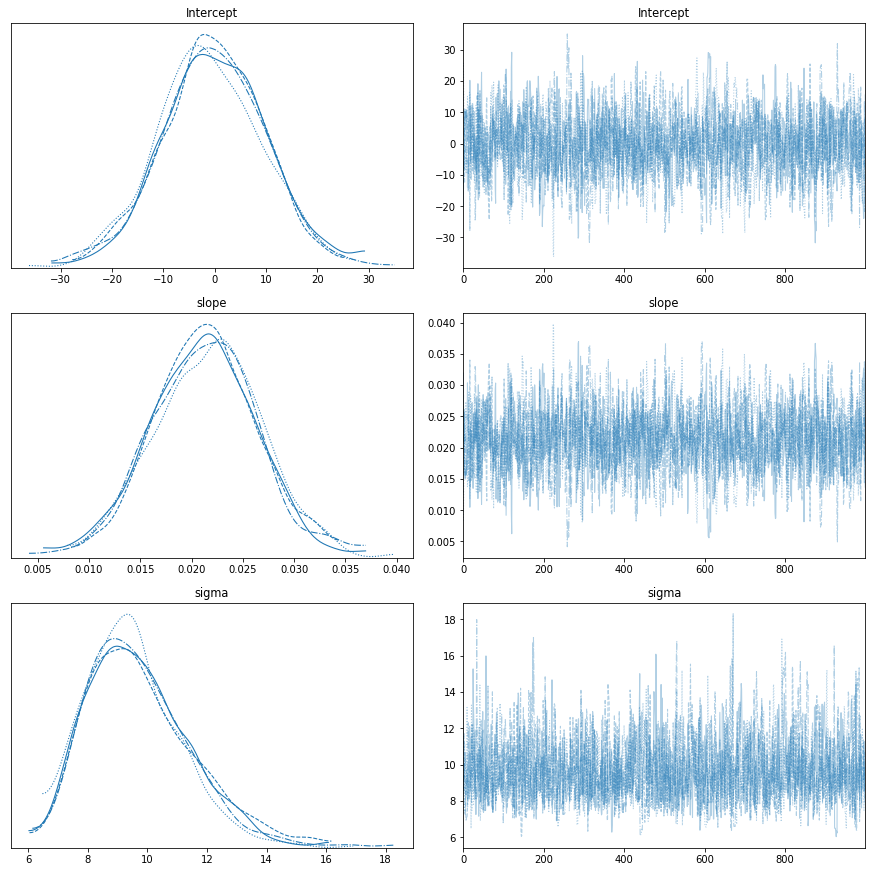

In [25]:
pm.traceplot(linear_trace, figsize = (12, 12));

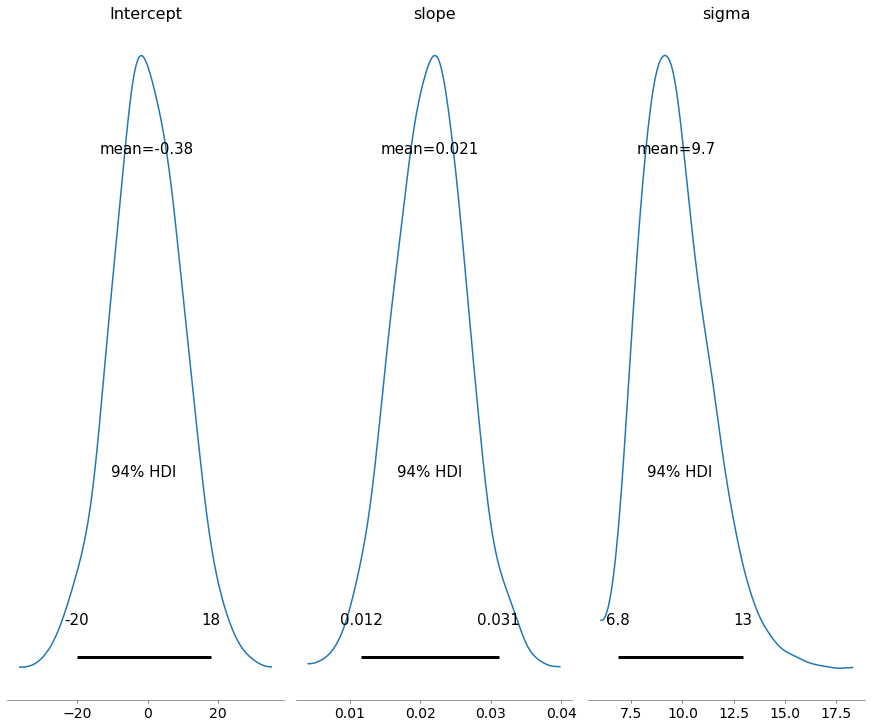

In [26]:
pm.plot_posterior(linear_trace, figsize = (12, 10));

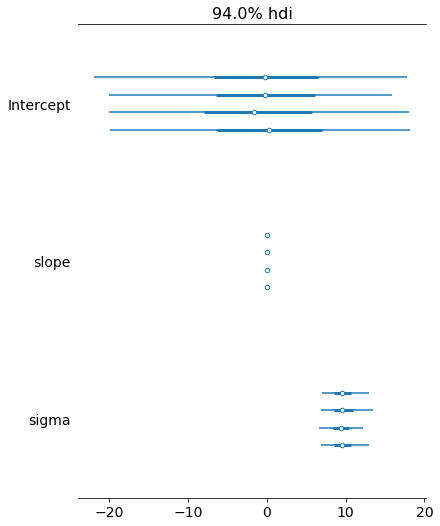

In [27]:
pm.forestplot(linear_trace);

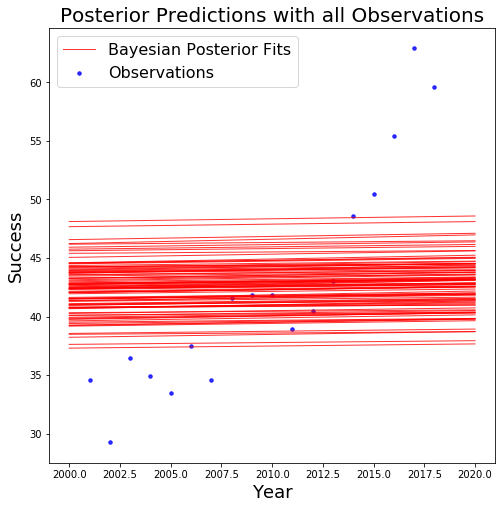

In [34]:
plt.figure(figsize = (8, 8))
pm.plot_posterior_predictive_glm(linear_trace, samples = 100, eval=np.linspace(2000, 2020, 20), linewidth = 1, 
                                 color = 'red', alpha = 0.8, label = 'Bayesian Posterior Fits',
                                lm = lambda x, sample: sample['Intercept'] + sample['slope'] * x);
plt.scatter(x, y.values, s = 12, alpha = 0.8, c = 'blue', label = 'Observations')
#plt.plot(X['Duration'], by_hand_coefs[0] + X['Duration'] * by_hand_coefs[1], 'k--', label = 'OLS Fit', linewidth = 1.4)
plt.title('Posterior Predictions with all Observations', size = 20); plt.xlabel('Year', size = 18);
plt.ylabel('Success', size = 18);
plt.legend(prop={'size': 16});


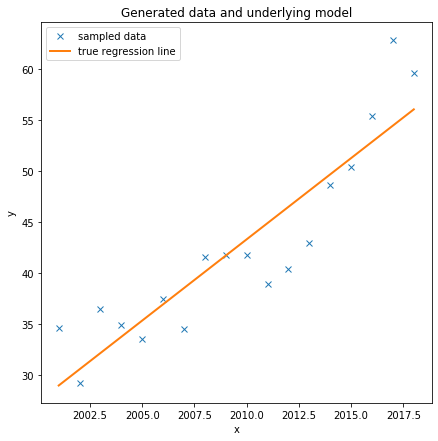

In [41]:
slope = 1.5924664602683178
intercept = -3157.5391296869625
true_regression_line = intercept + slope * x

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y, 'x', label='sampled data')
ax.plot(x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc=0);

In [45]:
from pymc3 import  *

In [95]:
with Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = HalfCauchy('sigma', beta=10, testval=1.)
    intercept = Normal('Intercept', 0, sigma=20)
    x_coeff = Normal('x', 0, sigma=20)

    # Define likelihood
    likelihood = Normal('y', mu=intercept + x_coeff * x,
                        sigma=sigma, observed=y)

    # Inference!
    trace = sample(4000, tune = 1000, cores=2) # draw 3000 posterior samples using NUTS sampling

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [x, Intercept, sigma]
Sampling 2 chains, 4 divergences:  37%|███▋      | 3724/10000 [00:26<00:43, 142.84draws/s]


RuntimeError: Chain 0 failed.

/Users/jacobberger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 504x504 with 0 Axes>

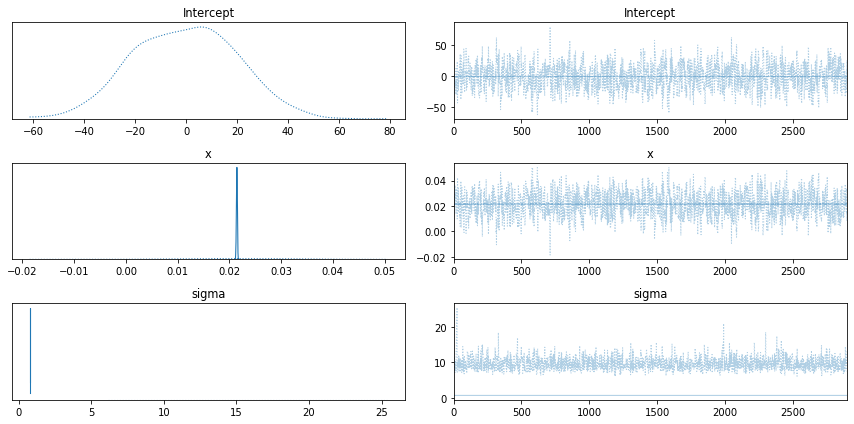

In [47]:
plt.figure(figsize=(7, 7))
traceplot(trace[100:])
plt.tight_layout();

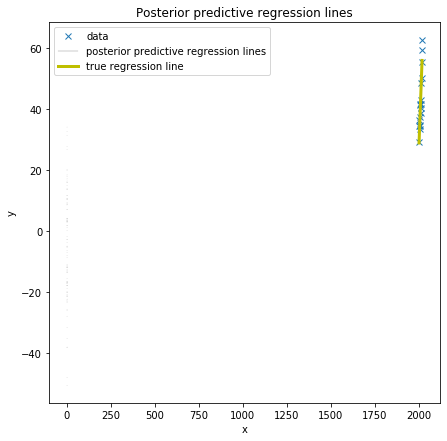

In [49]:

plt.figure(figsize=(7, 7))
plt.plot(x, y, 'x', label='data')
plot_posterior_predictive_glm(trace, samples=100,
                              label='posterior predictive regression lines')
plt.plot(x, true_regression_line, label='true regression line', lw=3., c='y')

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('y');

In [ ]:
Need to add burn in. default is 500 increase burn in and samples.
birth rates statistics... 
find a proxy for something that may relate to year (number of ivf publications from staff at facility, number of staff, number of briths...)

In [97]:
clinic_idx = df_17.ClinicID.values

with pm.Model() as hierarchical_model:
    # Hyperpriors for group nodes
    mu_a = pm.Normal('mu_alpha', mu=0., sigma=100)
    sigma_a = pm.HalfNormal('sigma_alpha', 5.)
    mu_b = pm.Normal('mu_beta', mu=0., sigma=100)
    sigma_b = pm.HalfNormal('sigma_beta', 5.)

    # Intercept for each county, distributed around group mean mu_a
    # Above we just set mu and sd to a fixed value while here we
    # plug in a common group distribution for all a and b (which are
    # vectors of length n_counties).
    a = pm.Normal('alpha', mu=mu_a, sigma=sigma_a, shape=len(df_17.CurrentClinicName1.unique()))
    # Slope for each county, distributed around group mean mu_b
    b = pm.Normal('beta', mu=mu_b, sigma=sigma_b, shape=len(df_17.CurrentClinicName1.unique()))

    # Model error
    eps = pm.HalfCauchy('eps', 5.)

    success_est = a[clinic_idx] + b[clinic_idx]*df_17.Year.values

    # Data likelihood
    success_like = pm.Normal('success_like', mu=success_est,
                           sigma=eps, observed=df_17.TotSuccess1)

In [98]:
with hierarchical_model:
    hierarchical_trace = pm.sample(2000, tune=2000, target_accept=.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, beta, alpha, sigma_beta, mu_beta, sigma_alpha, mu_alpha]
Sampling 4 chains, 12 divergences: 100%|██████████| 16000/16000 [08:57<00:00, 29.76draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8323771075530005, but should be close to 0.9. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


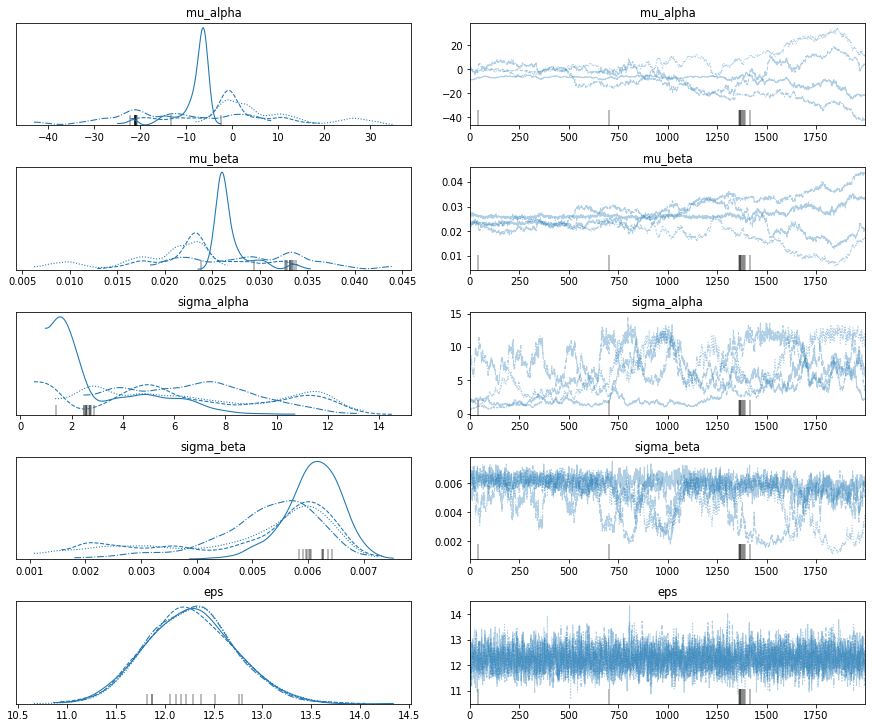

In [100]:

pm.traceplot(hierarchical_trace,
             var_names=['mu_alpha', 'mu_beta',
                        'sigma_alpha', 'sigma_beta',
                        'eps']);

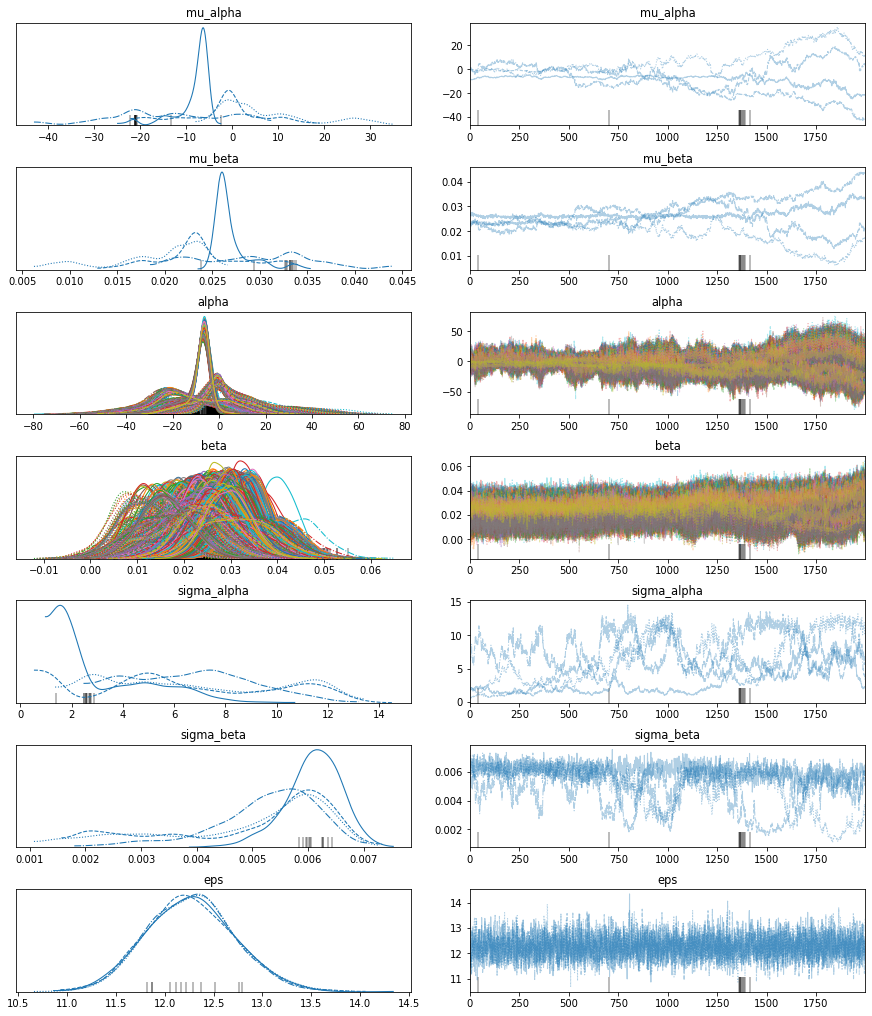

In [101]:
pm.traceplot(hierarchical_trace);

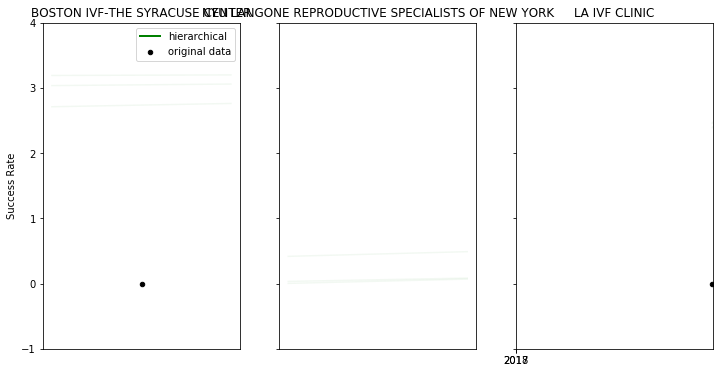

In [103]:
selection = ['BOSTON IVF-THE SYRACUSE CENTER', 'NYU LANGONE REPRODUCTIVE SPECIALISTS OF NEW YORK', 'LA IVF CLINIC']
fig, axis = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axis = axis.ravel()
for i, c in enumerate(selection):
    c_data = df_17.loc[df_17.CurrentClinicName1 == c]
    c_data = c_data.reset_index(drop = True)
    z = list(c_data['ClinicID'])[0]

    xvals = np.linspace(2016, 2020)
    #for a_val, b_val in zip(indiv_traces[c]['alpha'][::10], indiv_traces[c]['beta'][::10]):
    #    axis[i].plot(xvals, a_val + b_val * xvals, 'b', alpha=.05)
    #axis[i].plot(xvals, indiv_traces[c]['alpha'][::10].mean() + indiv_traces[c]['beta'][::10].mean() * xvals, 
    #             'b', alpha=1, lw=2., label='individual')
    for a_val, b_val in zip(hierarchical_trace['alpha'][::10][z], hierarchical_trace['beta'][::10][z]):
        axis[i].plot(xvals, a_val + b_val * xvals, 'g', alpha=.05)
    axis[i].plot(xvals, hierarchical_trace['alpha'][::10][z].mean() + hierarchical_trace['beta'][::10][z].mean() * xvals, 
                 'g', alpha=1, lw=2., label='hierarchical')
    axis[i].scatter(c_data.Year + np.random.randn(len(c_data))*0.01, c_data.TotSuccess1, 
                    alpha=1, color='k', marker='.', s=80, label='original data')
    axis[i].set_xticks([0,1])
    axis[i].set_xticklabels(['2017', '2018'])
    axis[i].set_ylim(-1, 4)
    axis[i].set_title(c)
    if not i%3:
        axis[i].legend()
        axis[i].set_ylabel('Success Rate')

In [52]:
a = df.ClinicNames.values

In [6]:
df_17 = pd.read_csv('df_17_18.csv')

In [7]:
len(df_17.CurrentClinicName1.unique())

489

In [8]:
def add_clinic_id(df):
    n=0
    clinic_dict = {}

    for name in df['CurrentClinicName1']:
        if name not in clinic_dict:
            clinic_dict.update({name:n})
            n += 1
    return clinic_dict

In [9]:
test_dict = add_clinic_id(df_17)

In [10]:
test_dict

{'ALABAMA FERTILITY SPECIALISTS': 0,
 'ART FERTILITY PROGRAM OF ALABAMA': 1,
 'UNIVERSITY OF ALABAMA AT BIRMINGHAM': 2,
 'CENTER FOR REPRODUCTIVE MEDICINE': 3,
 'UNIVERSITY OF SOUTH ALABAMA IVF AND ART PROGRAM': 4,
 'NEW DIRECTION FERTILITY CENTERS': 5,
 'TROCHÉ FERTILITY CENTERS': 6,
 'ARIZONA REPRODUCTIVE MEDICINE SPECIALISTS, LLC': 7,
 'GONDRA CENTER FOR REPRODUCTIVE CARE & ADVANCED GYNECOLOGY': 8,
 'SOUTHWEST FERTILITY CENTER': 9,
 'ADVANCED FERTILITY CARE, PLLC': 10,
 'ARIZONA ASSOCIATES FOR REPRODUCTIVE HEALTH': 11,
 'ARIZONA CENTER FOR FERTILITY STUDIES': 12,
 'BLOOM REPRODUCTIVE INSTITUTE': 13,
 'BOSTON IVF, THE ARIZONA CENTER, LLC': 14,
 'IVF PHOENIX': 15,
 'FERTILITY TREATMENT CENTER, PC': 16,
 'ARIZONA CENTER FOR REPRODUCTIVE ENDOCRINOLOGY AND INFERTILITY': 17,
 'ARIZONA REPRODUCTIVE INSTITUTE': 18,
 'REPRODUCTIVE HEALTH CENTER': 19,
 'ARKANSAS FERTILITY CENTER': 20,
 'LIFESTART FERTILITY CENTER': 21,
 'ALTA BATES IN VITRO FERTILIZATION PROGRAM': 22,
 'CENTER FOR REPRODUCTIV

In [11]:
len(test_dict.values())

489

In [12]:
df_17.loc[df_17.CurrentClinicName1 == 'CONCEIVE FERTILITY CENTER']

,Unnamed: 0,CurrentClinicName1,CurrentClinicCity,CurrentClinicState,Year,TotCycles1,TotCycles2,TotCycles3,TotCycles4,TotSuccess1,TotSuccess2,TotSuccess3,TotSuccess4
853,853,CONCEIVE FERTILITY CENTER,IRVING,TEXAS,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
test_dict['CONCEIVE FERTILITY CENTER']

485

In [13]:
def add_clinic_id(df):
    list_of_ids = []
    for name in df['CurrentClinicName1']:
        list_of_ids.append(test_dict[name])
    df['ClinicID'] = list_of_ids


In [14]:
add_clinic_id(df_17)

In [15]:
df_17['ClinicID']

0        0
1        1
2        2
3        3
4        4
      ... 
899    440
900    441
901    442
902    443
903    444
Name: ClinicID, Length: 904, dtype: int64

In [17]:
df_17.columns


Index(['Unnamed: 0', 'CurrentClinicName1', 'CurrentClinicCity',
       'CurrentClinicState', 'Year', 'TotCycles1', 'TotCycles2', 'TotCycles3',
       'TotCycles4', 'TotSuccess1', 'TotSuccess2', 'TotSuccess3',
       'TotSuccess4', 'ClinicID'],
      dtype='object')

In [18]:
# Convert years to 0 an 1
def convert_year(df):
    list_of_years =[]
    for y in df['Year']:
        if y == 2017:
            list_of_years.append(0)
        else:
            list_of_years.append(1)
    df['NewYear'] = list_of_years
    


In [19]:
convert_year(df_17)

In [20]:
df_17.NewYear

0      0
1      0
2      0
3      0
4      0
      ..
899    1
900    1
901    1
902    1
903    1
Name: NewYear, Length: 904, dtype: int64

In [26]:
clinic_idx = df_17.ClinicID.values

with pm.Model() as hierarchical_model:
    
    # Hyperpriors for group nodes
    mu_a = pm.Normal('mu_alpha', mu=0., sigma=1)
    sigma_a = pm.HalfCauchy('sigma_alpha', beta=10)
    mu_b = pm.Normal('mu_beta', mu=0., sigma=1)
    sigma_b = pm.HalfCauchy('sigma_beta', beta = 10)

    # Intercept for each clinic, distributed around group mean mu_a
    # Above we just set mu and sd to a fixed value while here we
    # plug in a common group distribution for all a and b (which are
    # vectors of length n_clinics).
    
    a = pm.Normal('alpha', mu=mu_a, sigma=sigma_a, shape=len(df_17.CurrentClinicName1.unique()))
    # Slope for each county, distributed around group mean mu_b
    b = pm.Normal('beta', mu=mu_b, sigma=sigma_b, shape=len(df_17.CurrentClinicName1.unique()))

    # Model error
    eps = pm.HalfCauchy('eps', 5.)

    success_est = (a[clinic_idx]*df_17.NewYear.values + 
                   b[clinic_idx])

    # Data likelihood
    success_like = pm.Normal('success_like', mu=success_est,
                           sigma=eps, observed=df_17.TotSuccess1)

In [28]:
with hierarchical_model:
    hierarchical_trace = pm.sample(2000, tune=4000, target_accept=.8, discard_tuned_samples=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, beta, alpha, sigma_beta, mu_beta, sigma_alpha, mu_alpha]
Sampling 4 chains, 906 divergences: 100%|██████████| 24000/24000 [03:15<00:00, 122.71draws/s]
There were 28 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6195841753770918, but should be close to 0.8. Try to increase the number of tuning steps.
There were 195 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.4332650079640754, but should be close to 0.8. Try to increase the number of tuning steps.
There were 210 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5208136778531449, but should be close to 0.8. Try to increase the number of tuning steps.
There we

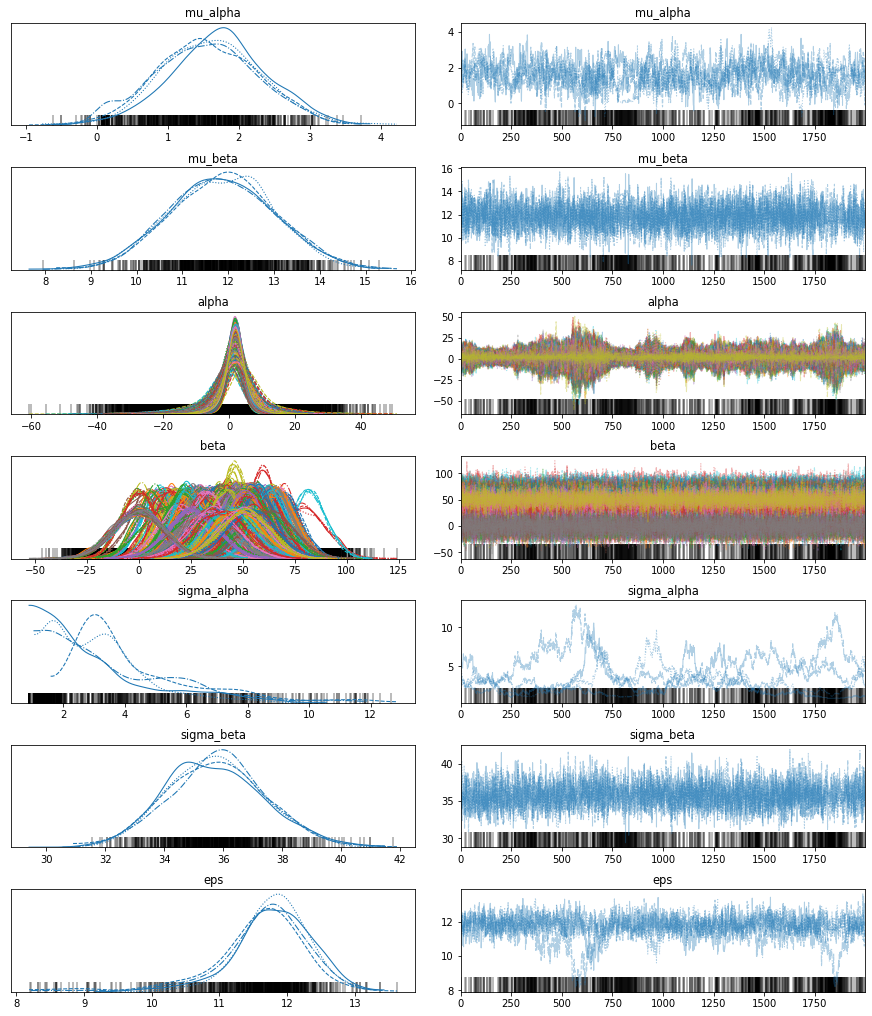

In [29]:
pm.traceplot(hierarchical_trace);

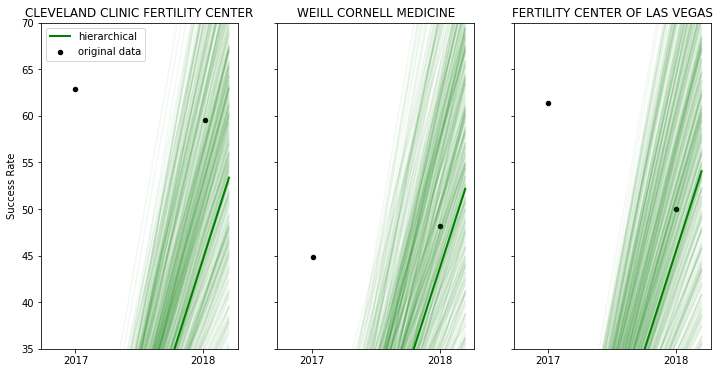

In [30]:
selection = ['CLEVELAND CLINIC FERTILITY CENTER', 'WEILL CORNELL MEDICINE', 'FERTILITY CENTER OF LAS VEGAS']
fig, axis = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axis = axis.ravel()
for i, c in enumerate(selection):
    c_data = df_17.loc[df_17.CurrentClinicName1 == c]
    c_data = c_data.reset_index(drop = True)
    z = list(c_data['ClinicID'])[0]

    xvals = np.linspace(-0.2, 1.2)
    #for a_val, b_val in zip(indiv_traces[c]['alpha'][::10], indiv_traces[c]['beta'][::10]):
    #    axis[i].plot(xvals, a_val + b_val * xvals, 'b', alpha=.05)
    #axis[i].plot(xvals, indiv_traces[c]['alpha'][::10].mean() + indiv_traces[c]['beta'][::10].mean() * xvals, 
    #             'b', alpha=1, lw=2., label='individual')
    for a_val, b_val in zip(hierarchical_trace['alpha'][::10][z], hierarchical_trace['beta'][::10][z]):
        axis[i].plot(xvals, a_val + b_val * xvals, 'g', alpha=.05)
    axis[i].plot(xvals, hierarchical_trace['alpha'][::10][z].mean() + hierarchical_trace['beta'][::10][z].mean() * xvals, 
                 'g', alpha=1, lw=2., label='hierarchical')
    axis[i].scatter(c_data.NewYear + np.random.randn(len(c_data))*0.01, c_data.TotSuccess1, 
                    alpha=1, color='k', marker='.', s=80, label='original data')
    axis[i].set_xticks([0,1])
    axis[i].set_xticklabels(['2017', '2018'])
    axis[i].set_ylim(35, 70)
    axis[i].set_title(c)
    if not i%3:
        axis[i].legend()
        axis[i].set_ylabel('Success Rate')

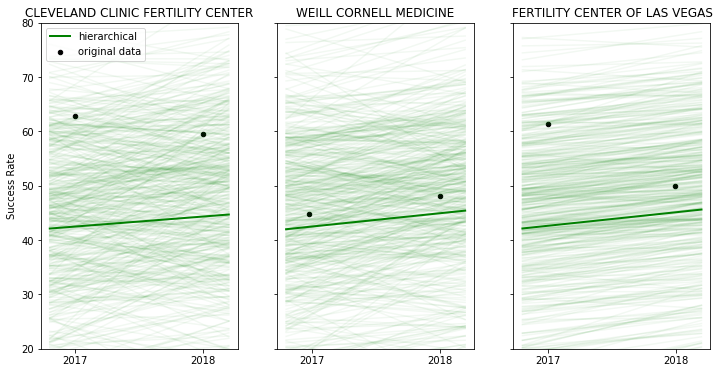

In [25]:
selection = ['CLEVELAND CLINIC FERTILITY CENTER', 'WEILL CORNELL MEDICINE', 'FERTILITY CENTER OF LAS VEGAS']
fig, axis = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axis = axis.ravel()
for i, c in enumerate(selection):
    c_data = df_17.loc[df_17.CurrentClinicName1 == c]
    c_data = c_data.reset_index(drop = True)
    z = list(c_data['ClinicID'])[0]

    xvals = np.linspace(-0.2, 1.2)
    #for a_val, b_val in zip(indiv_traces[c]['alpha'][::10], indiv_traces[c]['beta'][::10]):
    #    axis[i].plot(xvals, a_val + b_val * xvals, 'b', alpha=.05)
    #axis[i].plot(xvals, indiv_traces[c]['alpha'][::10].mean() + indiv_traces[c]['beta'][::10].mean() * xvals, 
    #             'b', alpha=1, lw=2., label='individual')
    for a_val, b_val in zip(hierarchical_trace['alpha'][::10][z], hierarchical_trace['beta'][::10][z]):
        axis[i].plot(xvals, a_val + b_val * xvals, 'g', alpha=.05)
    axis[i].plot(xvals, hierarchical_trace['alpha'][::10][z].mean() + hierarchical_trace['beta'][::10][z].mean() * xvals, 
                 'g', alpha=1, lw=2., label='hierarchical')
    axis[i].scatter(c_data.NewYear + np.random.randn(len(c_data))*0.01, c_data.TotSuccess1, 
                    alpha=1, color='k', marker='.', s=80, label='original data')
    axis[i].set_xticks([0,1])
    axis[i].set_xticklabels(['2017', '2018'])
    axis[i].set_ylim(20, 80)
    axis[i].set_title(c)
    if not i%3:
        axis[i].legend()
        axis[i].set_ylabel('Success Rate')

In [1]:
# Try to build new model for specific purpose

In [ ]:
with pm.Model() as success_model:
    
    #define hyperpriors
    mu_a = pm.Normal('mu_alpha', mu=0., sigma=1)
    sigma_a = pm.HalfCauchy('sigma_alpha', beta = 10)   
    
    #define hyperpriors for different clinics based on parent
    a = pm.Normal('alpha', mu=mu_a, sigma=sigma_a, shape=len(df_17.CurrentClinicName1.unique()))
    
    
    #define liklihood
    
    success = pm.Poisson('success', rate, observed = y_data)